# 1. Importación

In [1]:
#data analysis

import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.ensemble import RandomForestClassifier

# 2. Carga de los datos

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

# 3. Calidad de datos

- Unificamos **train** y **test** para realizar la corrección de datos.
- Aplicamos correcciones en los **tipos de datos**, eliminamos **duplicados** y tratamos los valores **nulos**.
- Volvemos a separar **train** y **test**, eliminando las columnas que ya no son necesarias.

In [3]:
train_df["is_train"] = 1
test_df["is_train"] = 0

In [4]:
df = pd.concat([train_df, test_df], ignore_index=True)

## 3.1. Tipos de datos: Corrección

- Cambiamos el tipo de dato `Survived` a un Int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  is_train     1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [6]:
df["Survived"] = df["Survived"].round().astype("Int64")

### 3.1.1. Duplicados

- No se han encontrado duplicados

In [7]:
df.duplicated().sum()

0

### 3.1.2. Nulos

- **Cabin** tiene demasiados valores nulos, por lo que se _eliminó_ la columna.
- Para **Age**, utilizamos la _mediana_ por grupo, considerando las variables `Pclass`, `Sex` y `Embarked`.
- Rellenamos los valores nulos de **Embarked** con el _valor más frecuente_.
- Los valores nulos de **Fare** se rellenaron con la _mediana_.
- **Survived** es la variable objetivo, por lo que _no se realizaron cambios_.

In [8]:
df.isna().sum().sort_values(ascending = False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
is_train          0
dtype: int64

In [9]:
df.drop(columns=["Cabin"], inplace=True)

In [10]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [11]:
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [12]:
df['Age'] = df.groupby(['Pclass', 'Sex', 'Embarked'])['Age'].transform(lambda x: x.fillna(x.median()))

## 3.2 Separamos train y test

In [13]:
train_df = df[df["is_train"] == 1]
test_df = df[df["is_train"] == 0]

## 3.3 Eliminamos columnas que ya no nos sirven

In [14]:
test_df = test_df.drop(columns=["Survived"], errors="ignore")

In [15]:
train_df = train_df.drop(columns=["is_train"])
test_df = test_df.drop(columns=["is_train"])

### 3.3.1 Comprobación

In [16]:
train_df.info()
print('__ '*15)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: Int64(1), float64(2), int64(4), object(4)
memory usage: 84.4+ KB
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

# 4. EDA

### Distribución de los valores
  - El **38.38%** de los pasajeros sobrevivieron (`Survived` = 1), mientras que el **61.62%** no lo hicieron, lo que indica una tasa de supervivencia relativamente baja.

  - La media de la clase de los pasajeros es **2.31** (`Pclass`), lo que sugiere que la mayoría de los pasajeros viajaron en la **segunda** o **tercera** clase. Solo una pequeña parte de los pasajeros viajaron en **primera clase**.

  - La edad promedio de los pasajeros es de **29.1 años**, con una mediana de **26 años**, lo que indica que la mayoría de los pasajeros eran adultos jóvenes. El rango de edades es amplio, desde **0.42** años hasta **80 años**, con una desviación estándar de **13.37 años**.

  - La tarifa promedio es de **32.2**, pero con una alta desviación estándar de **49.69**, lo que refleja una gran variabilidad en los precios de los boletos. Las tarifas van desde **0** hasta **512.33**, lo que sugiere que algunos pasajeros pagaron tarifas muy bajas, mientras que otros pagaron por boletos de lujo.

In [17]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.0,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.101762,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.374112,1.102743,0.806057,49.693429
min,1.000000,0.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.0,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.0,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.0,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.0,3.000000,80.000000,8.000000,6.000000,512.329200


## 4.1. Análisis mediante funciones pivotantes

- **Clase de Ticket**: Los pasajeros con ticket de **clase superior** tuvieron una tasa de supervivencia más alta.
  
- **Sexo**: Las pasajeras **femeninas** (`Sex = female`) tuvieron un alto porcentaje de supervivencia, alcanzando el **74%**.

- **Hermanos/Esposos a bordo**: Las personas que tenían **hermanos/as o esposos/as** a bordo tuvieron una tasa de supervivencia del **53%**.

- **Padres/Hijos a bordo**: Las personas con **3 padres/hijos** a bordo fueron las que más sobrevivieron, con una tasa de supervivencia del **60%**.

In [18]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.62963
1,2,0.472826
2,3,0.242363


In [19]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.25
4,4,0.166667
5,5,0.0
6,8,0.0


In [21]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.6
1,1,0.550847
2,2,0.5
0,0,0.343658
5,5,0.2
4,4,0.0
6,6,0.0


## 4.2. Análisis mediante visualización de los datos

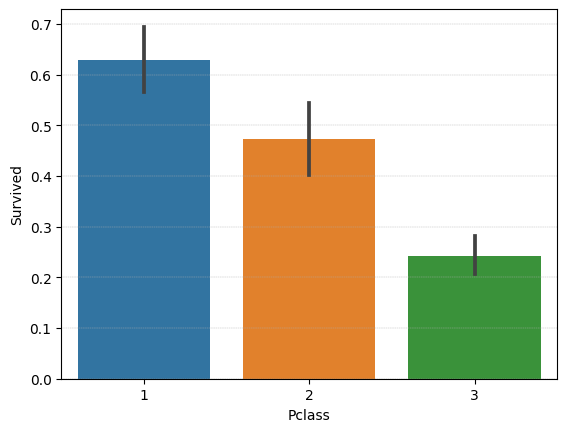

In [22]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.3)

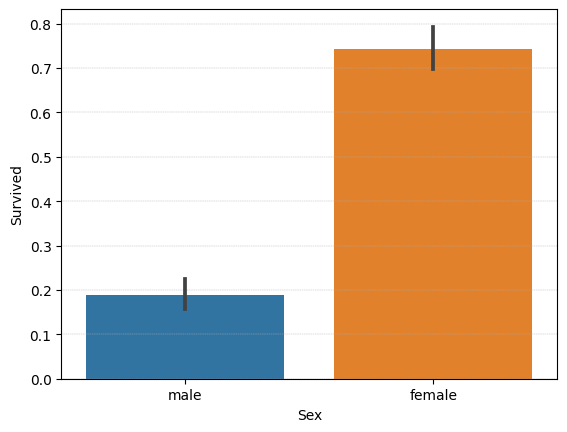

In [23]:
sns.barplot(x='Sex',y='Survived', data=train_df)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.3)

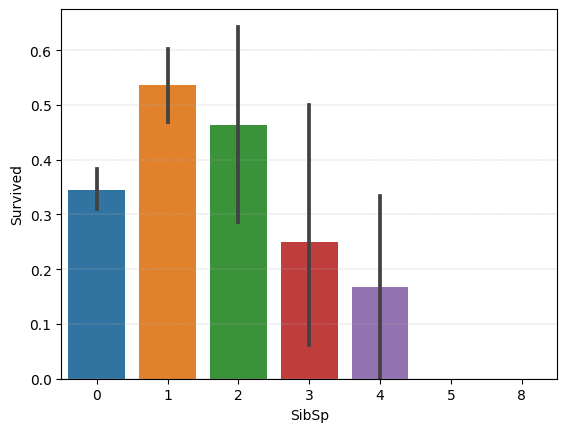

In [24]:
sns.barplot(x='SibSp',y='Survived',data=train_df)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.3)

# 5. Transformación de datos

- **Eliminación de variables**: Eliminamos las variables que no aportan al modelo, en este caso **Name** y **Ticket**.
  
- **Transformación de 'Sex'**: Utilizamos **Label Encoding** para convertir la variable **'Sex'** en valores numéricos.

- **Transformación de 'Embarked'**: Aplicamos **Ordinal Encoding** a la variable **'Embarked'**.

- **Transformación de 'Fare'**: Simplificamos la variable **'Fare'** usando **Ordinal Encoding**.

In [25]:
train_df = train_df.drop(columns=['Name', 'Ticket'])
test_df = test_df.drop(columns=['Name', 'Ticket'])

In [26]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [27]:
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [28]:
combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

   
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,0,0
1,2,1,1,1,38.0,1,0,3,1
2,3,1,3,1,26.0,0,0,1,0
3,4,1,1,1,35.0,1,0,3,0
4,5,0,3,0,35.0,0,0,1,0
5,6,0,3,0,25.0,0,0,1,2
6,7,0,1,0,54.0,0,0,3,0
7,8,0,3,0,2.0,3,1,2,0
8,9,1,3,1,27.0,0,2,1,0
9,10,1,2,1,14.0,1,0,2,1


# 6. Preselección de variables

- Creamos una nueva variable llamada `Family Size` para sustituir `SibSp` y `Parch`
- Eliminamos `PassengerId`, ya que no nos aporta nada

In [29]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [30]:
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [31]:
train_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True)

# 7. Modelización

## 7.1. Hiperparametrización

- Decidí probar el parámetro `max_depth` como parte del proceso de optimización de hiperparámetros, aunque no considero que sea estrictamente necesario.
- La idea detrás de probar este parámetro fue explorar cómo la profundidad máxima del árbol de decisión podría influir en el rendimiento del modelo.

In [32]:
X = train_df.drop(columns='Survived')
y = train_df['Survived']

In [33]:
algoritmo = RandomForestClassifier()

In [34]:
parametro = 'max_depth'

In [35]:
rango = np.arange(3,8)

In [36]:
from sklearn.model_selection import validation_curve

In [37]:
train_scores, test_scores = validation_curve(
                                estimator = algoritmo,
                                X = X,
                                y = y,
                                param_name = parametro,
                                param_range = rango,
                                cv = 3,
                                scoring = 'neg_mean_absolute_error',
                                n_jobs = 1,
                                verbose = 3)

[CV] END .....max_depth=3;, score=(train=-0.152, test=-0.195) total time=   0.2s
[CV] END .....max_depth=4;, score=(train=-0.146, test=-0.192) total time=   0.2s
[CV] END .....max_depth=5;, score=(train=-0.123, test=-0.195) total time=   0.2s
[CV] END .....max_depth=6;, score=(train=-0.108, test=-0.195) total time=   0.2s
[CV] END .....max_depth=7;, score=(train=-0.094, test=-0.209) total time=   0.2s
[CV] END .....max_depth=3;, score=(train=-0.180, test=-0.175) total time=   0.2s
[CV] END .....max_depth=4;, score=(train=-0.163, test=-0.182) total time=   0.2s
[CV] END .....max_depth=5;, score=(train=-0.152, test=-0.178) total time=   0.2s
[CV] END .....max_depth=6;, score=(train=-0.133, test=-0.165) total time=   0.2s
[CV] END .....max_depth=7;, score=(train=-0.109, test=-0.168) total time=   0.2s
[CV] END .....max_depth=3;, score=(train=-0.163, test=-0.189) total time=   0.2s
[CV] END .....max_depth=4;, score=(train=-0.157, test=-0.182) total time=   0.2s
[CV] END .....max_depth=5;, 

In [38]:
test_scores

array([[-0.1952862 , -0.17508418, -0.18855219],
       [-0.19191919, -0.18181818, -0.18181818],
       [-0.1952862 , -0.17845118, -0.17508418],
       [-0.1952862 , -0.16498316, -0.17508418],
       [-0.20875421, -0.16835017, -0.18181818]])

In [39]:
df_resultados = pd.DataFrame({'Resultado': np.mean(test_scores, axis = 1)}, index = rango)

In [40]:
df_resultados

,Resultado
3,-0.186308
4,-0.185185
5,-0.182941
6,-0.178451
7,-0.186308


In [41]:
scores = df_resultados['Resultado']

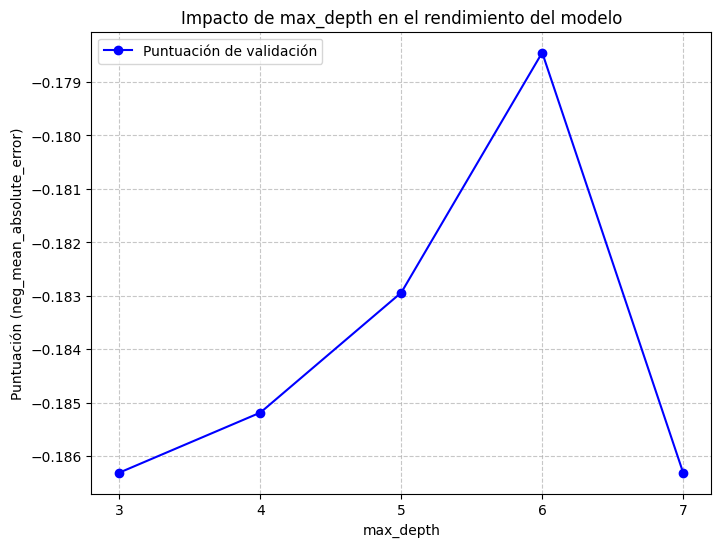

In [42]:
# Ajuste sobre el rango usado
param_range = np.arange(3, 8)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(param_range, scores, marker='o', linestyle='-', color='b', label='Puntuación de validación')

# Personalizar el gráfico
plt.title('Impacto de max_depth en el rendimiento del modelo')
plt.xlabel('max_depth')
plt.ylabel('Puntuación (neg_mean_absolute_error)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(param_range)  # Asegura que las etiquetas del eje X sean los valores numéricos correctos
plt.legend()

# Mostrar el gráfico
plt.show()

## 7.2. Ejecución del modelo

Usamos `RandomForestClassifier`, un algoritmo de ensamble basado en árboles de decisión, que es robusto ante valores atípicos y permite evaluar la importancia de cada variable.  

**Pasos:**  
1. Separamos las variables predictoras (`X`) y la variable objetivo (`y`).  
2. Dividimos los datos en entrenamiento y validación para evaluar el desempeño del modelo.  
3. Entrenamos un `RandomForestClassifier` con hiperparámetros predeterminados.  
4. Evaluamos la precisión del modelo y analizamos la importancia de las características.  

Este modelo nos permitirá obtener una predicción sobre los pasajeros que probablemente sobrevivieron.  

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=5,
                                  random_state=42,
                                  n_jobs=-1)


In [45]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

# 7.3. Predicciones

In [46]:
y_pred = rf_model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.820627802690583


# 8. Submission 

- Recuperamos **PassengerId** para enviarlo la competición.
- Transformamos **Survived** a tipo entero.


In [49]:
predictions = rf_model.predict(test_df)
predictions = predictions.astype(int)

In [50]:
Passenger = pd.read_csv('../input/titanic/test.csv')

In [51]:
output = pd.DataFrame({
    'PassengerId': Passenger['PassengerId'],
    'Survived': predictions
})

In [52]:
output.to_csv('submission.csv', index=False)